#CSE-221710306018-KAVYASREEGAMPA

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("Wholesale customers data.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print( "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [4]:
# Retrieve column names
# Alternative code:
# data.keys()
data.columns


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [5]:
# Fresh filter
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [6]:
# Frozen filter
frozen_q1 = 742.250000
display(data.loc[data.Frozen < frozen_q1, :].head())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [7]:
# Frozen
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


In [8]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print ("Chosen samples of Wholesale customers dataset:")
display(samples)


Chosen samples of Wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


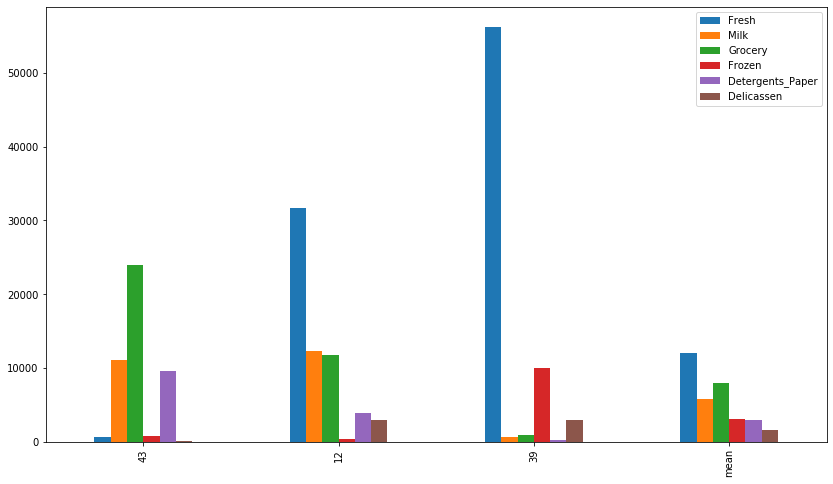

In [9]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

# Get the means 
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))


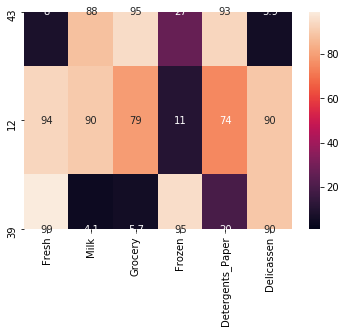

In [10]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)
